# Text Classification Exercise: Movie Reviews

## Introduction

This exercise uses the data from Kaggle's [IMDB Movie reviews](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition.

In this tutorial competition, we dig a little "deeper" into sentiment analysis. **Google's Word2Vec** is a deep-learning inspired method that focuses on the meaning of words. **Word2Vec attempts to understand meaning and semantic relationships among words**. It works in a way that is similar to deep approaches, such as recurrent neural nets or deep neural nets, but is computationally more efficient. This tutorial focuses on Word2Vec for **sentiment analysis**.

Sentiment analysis is a challenging subject in machine learning. People express their emotions in language that is often obscured by sarcasm, ambiguity, and plays on words, all of which could be very misleading for both humans and computers. In this tutorial we explore how Word2Vec can be applied to a similar problem.

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

**File descriptions**

- labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review. This is available as **`labeledTrainData.tsv.zip`**
- testData - The test set. The tab-delimited file has a header row followed by 25,000 rows containing an id and text for each review. Your task is to predict the sentiment for each one. 
- unlabeledTrainData - An extra training set with no labels. The tab-delimited file has a header row followed by 50,000 rows containing an id and text for each review. 
- sampleSubmission - A comma-delimited sample submission file in the correct format.

### Data fields

- **id** - Unique ID of each review
- **sentiment** - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
- **review** - Text of the review

## Acknowledgements

This dataset was collected in association with the following publication:

Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). "Learning Word Vectors for Sentiment Analysis." The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011). (link)

Please email the author of that paper if you use the data for any research applications. The tutorial was developed by Angela Chapman during her summer 2014 internship at Kaggle.

## Metric

Submissions are judged on **area under the ROC curve**. 

### Submission Instructions

You should submit a comma-separated file with 25,000 row plus a header row. There should be 2 columns: "id" and "sentiment", which contain your binary predictions: 1 for positive reviews, 0 for negative reviews. For an example, see "sampleSubmission.csv" on the Data page. 

#### id,sentiment
- 123_45,0 
- 678_90,1
- 12_34,0

In [1]:
import pandas as pd
import numpy as np

In [2]:
#data = pd.read_table('/Users/debajyotidas/Documents/GitHub/IMDB Reviews Sentiment Analysis using NLP Technques/Data/labeledTrainData.tsv.zip', header=None, names=['id','sentiment','review'])

In [3]:
!pip install kaggle --quiet

In [4]:
#Make a directory for Kaggle
!mkdir .kaggle

In [5]:
#Connect Google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Copy kaggle.json file. Change gdrive folder based on where you have saved your json file from Kaggle
!cp '/content/drive/My Drive/kaggle/kaggle.json' /content/.kaggle/kaggle.json

In [7]:
#Check if json file is there
!ls -l /content/.kaggle

total 4
-rw------- 1 root root 68 Apr 10 17:21 kaggle.json


In [8]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

- path is now set to: {/content}


In [9]:
#Verifying Kaggle Connection
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-10 08:12:55           2382  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1384  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1043  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            230  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [10]:
!kaggle competitions download -c word2vec-nlp-tutorial -p /content

 38% 10.0M/26.0M [00:00<00:00, 101MB/s]
100% 26.0M/26.0M [00:00<00:00, 167MB/s]
 39% 5.00M/13.0M [00:00<00:00, 50.3MB/s]
100% 13.0M/13.0M [00:00<00:00, 82.8MB/s]
 47% 6.00M/12.6M [00:00<00:00, 61.9MB/s]
100% 12.6M/12.6M [00:00<00:00, 80.9MB/s]
  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 89.1MB/s]


In [11]:
#Confirm data has been downloaded
!ls -l

total 53112
drwx------ 5 root root     4096 Apr 10 17:21 drive
-rw-r--r-- 1 root root 13585269 Apr 10 17:21 labeledTrainData.tsv.zip
drwxr-xr-x 1 root root     4096 Apr  7 13:36 sample_data
-rw-r--r-- 1 root root   282796 Apr 10 17:21 sampleSubmission.csv
-rw-r--r-- 1 root root 13258140 Apr 10 17:21 testData.tsv.zip
-rw-r--r-- 1 root root 27243285 Apr 10 17:21 unlabeledTrainData.tsv.zip


In [12]:
data = pd.read_csv('labeledTrainData.tsv.zip',header=0, delimiter="\t", quoting=3)

In [13]:
data.shape

(25000, 3)

In [14]:
data.sample(n=5)

,id,sentiment,review
6295,"""1512_2""",0,"""A bad rip-off attempt on \""Seven\"", complete ..."
22566,"""7406_9""",1,"""Very different topic treated in this film. A ..."
919,"""6900_8""",1,"""\""Fanfan la tulipe\"" is still Gerard Philippe..."
4498,"""8062_2""",0,"""I'm just quite disappointed with \""Soul Survi..."
16283,"""9937_10""",1,"""This TV-series was one of the ones I loved wh..."


In [15]:
data.drop(columns='id')

,sentiment,review
0,1,"""With all this stuff going down at the moment ..."
1,1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,0,"""The film starts with a manager (Nicholas Bell..."
3,0,"""It must be assumed that those who praised thi..."
4,1,"""Superbly trashy and wondrously unpretentious ..."
...,...,...
24995,0,"""It seems like more consideration has gone int..."
24996,0,"""I don't believe they made this film. Complete..."
24997,0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,0,"""This 30 minute documentary Buñuel made in the..."


In [16]:
data.groupby('sentiment').count()

,id,review
sentiment,,
0,12500,12500
1,12500,12500


In [17]:
#Dropping one odd sentiment stored as text
data.drop(data[data['sentiment']=='sentiment'].index,inplace=True)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# split X and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data.review, data.sentiment, random_state=42)
#default split is 25% if neither test_size/train_size is mentioned

In [20]:
#Traing data
print(x_train.shape)
print(y_train.shape)

(18750,)
(18750,)


In [21]:
#Test Data
print(x_test.shape)
print(y_test.shape)

(6250,)
(6250,)


In [22]:
x_train.sample(n=5)

5694     "(contains slight spoilers)<br /><br />It's in...
4718     "This one has a lot going for it - Sinatra, St...
12243    "This is simply the funniest movie I've seen i...
23012    "A different look at horror. The styling diffe...
9066     "How to lose friends and alienate people is de...
Name: review, dtype: object

In [23]:
#Converting the dependent variable as Integer, so as to be able to use it in Deep Learning
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [24]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [36]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [37]:
#Creating a Lemmatizer for preprocessing
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [38]:
import re
from bs4 import BeautifulSoup

In [39]:
class PreProcessor:
    def __call__(self, doc):
        soup = BeautifulSoup(doc, "html.parser")
        stripped_text = soup.get_text()
        #Using regex
        text = re.sub(r'[^a-zA-z\s]', '', stripped_text)
        return text

Using **CountVectorizer** first

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(stop_words='english',preprocessor=PreProcessor(),tokenizer=LemmaTokenizer(),ngram_range=(1, 5),max_df=0.2,min_df=2,max_features=10000)
#max_df=0.2 means we ignore words which are present in more than 20% of documents
#min_df=0.01/10 means we ignore words which are present in less than 1%/10 documents

In [41]:
X_train_ct = cvect.fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [42]:
X_train_ct.shape

(18750, 10000)

In [43]:
len(cvect.vocabulary_)

10000

In [44]:
X_test_ct = cvect.transform(x_test)

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
#instantiate the model (with the default parameters)
mnb = MultinomialNB()

#fit the model with data (occurs in-place)
mnb.fit(X_train_ct, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
from sklearn import metrics

In [48]:
print ('Training accuracy of MultinomialNB using CountVectorizer',metrics.accuracy_score(y_train, mnb.predict(X_train_ct)))

Training accuracy of MultinomialNB using CountVectorizer 0.8744533333333333


In [49]:
print ('Testing accuracy of MultinomialNB using CountVectorizer',metrics.accuracy_score(y_test, mnb.predict(X_test_ct)))

Testing accuracy of MultinomialNB using CountVectorizer 0.84912


In [50]:
cr=metrics.classification_report(y_test,mnb.predict(X_test_ct))
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3092
           1       0.85      0.85      0.85      3158

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250



In [51]:
mnb_probs = mnb.predict_proba(X_test_ct)
mnb_probs=mnb_probs[:,1] #Keeping probabilities of only 1 sentiment
metrics.roc_auc_score(y_test,mnb_probs)

0.9193328285133057

Using **TfIdfVectorizer** now

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',preprocessor=PreProcessor(),tokenizer=LemmaTokenizer(),ngram_range=(1, 5),max_df=0.2,min_df=2,max_features=10000)

In [53]:
X_train_tfidf = tfidf.fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [54]:
len(tfidf.vocabulary_)

10000

In [55]:
X_train_tfidf.shape

(18750, 10000)

In [56]:
X_test_tfidf = tfidf.transform(x_test)

In [57]:
#fit the model with data (occurs in-place)
mnb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
print ('Training accuracy of MultinomialNB using TfIdfVectorizer',metrics.accuracy_score(y_train, mnb.predict(X_train_tfidf)))

Training accuracy of MultinomialNB using TfIdfVectorizer 0.8865066666666667


In [59]:
print ('Testing accuracy of MultinomialNB using TfIdfVectorizer',metrics.accuracy_score(y_test, mnb.predict(X_test_tfidf)))

Testing accuracy of MultinomialNB using TfIdfVectorizer 0.85744


In [60]:
cr=metrics.classification_report(y_test,mnb.predict(X_test_tfidf))
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      3092
           1       0.85      0.87      0.86      3158

    accuracy                           0.86      6250
   macro avg       0.86      0.86      0.86      6250
weighted avg       0.86      0.86      0.86      6250



In [61]:
mnb_probs = mnb.predict_proba(X_test_tfidf)
mnb_probs=mnb_probs[:,1] #Keeping probabilities of only 1 sentiment
metrics.roc_auc_score(y_test,mnb_probs)

0.9332182297243823

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=100,criterion='entropy',oob_score=True,random_state=42)

In [63]:
#fit the model with data (occurs in-place)
rfcl.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [64]:
print ('Testing accuracy of RandomForestClassifier using TfIdfVectorizer',metrics.accuracy_score(y_test, rfcl.predict(X_test_tfidf)))

Testing accuracy of RandomForestClassifier using TfIdfVectorizer 0.8384


In [65]:
cr=metrics.classification_report(y_test,rfcl.predict(X_test_tfidf))
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3092
           1       0.84      0.83      0.84      3158

    accuracy                           0.84      6250
   macro avg       0.84      0.84      0.84      6250
weighted avg       0.84      0.84      0.84      6250



In [66]:
rfcl_probs = rfcl.predict_proba(X_test_tfidf)
rfcl_probs=rfcl_probs[:,1] #Keeping probabilities of only 1 sentiment
metrics.roc_auc_score(y_test,rfcl_probs)

0.9207243436861722

In [67]:
import tensorflow as tf

In [68]:
tf.keras.backend.clear_session()
model1 = tf.keras.Sequential()

In [69]:
#Add hidden layers
model1.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(len(tfidf.vocabulary_),)))
#model1.add(tf.keras.layers.Dropout(0.4))
model1.add(tf.keras.layers.Dense(50, activation='relu'))
#model1.add(tf.keras.layers.Dropout(0.4))
#Add Output layer
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000100   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,005,201
Trainable params: 1,005,201
Non-trainable params: 0
_________________________________________________________________


In [70]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
hist_tfidf=model1.fit(X_train_tfidf.todense(), y_train,
                     validation_data=(X_test_tfidf.todense(), y_test), 
                     epochs=10, batch_size=32)

Epoch 1/10
586/586 [==============================] - 7s 4ms/step - loss: 0.4448 - accuracy: 0.8029 - val_loss: 0.2935 - val_accuracy: 0.8744
Epoch 2/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1458 - accuracy: 0.9511 - val_loss: 0.3361 - val_accuracy: 0.8674
Epoch 3/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0780 - accuracy: 0.9763 - val_loss: 0.4368 - val_accuracy: 0.8581
Epoch 4/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.6253 - val_accuracy: 0.8546
Epoch 5/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0172 - accuracy: 0.9940 - val_loss: 0.7666 - val_accuracy: 0.8573
Epoch 6/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.9342 - val_accuracy: 0.8525
Epoch 7/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 1.0801 - val_accuracy: 0.8525
Epoch 

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

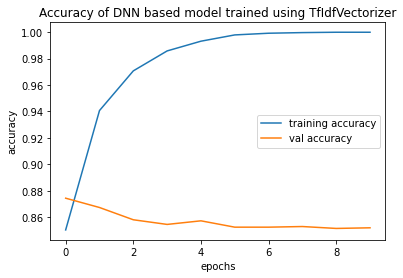

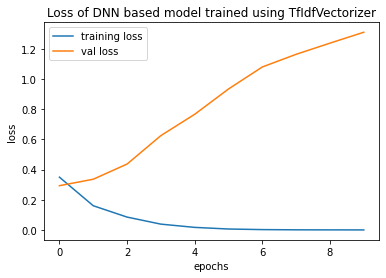

In [73]:
plt.figure(0)
plt.plot(hist_tfidf.history['accuracy'], label='training accuracy')
plt.plot(hist_tfidf.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy of DNN based model trained using TfIdfVectorizer')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(hist_tfidf.history['loss'], label='training loss')
plt.plot(hist_tfidf.history['val_loss'], label='val loss')
plt.title('Loss of DNN based model trained using TfIdfVectorizer')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [74]:
model1_probs = model1.predict(X_test_tfidf.todense())
metrics.roc_auc_score(y_test,model1_probs)

0.9259422567544429

Using **Word2Vec** Tokenizer

In [75]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000) # num_words -> Vocablury size

In [76]:
#Fit tokenizer with actual training data
tokenizer.fit_on_texts(x_train.tolist())

In [77]:
#Replace each word in the text with word's index
X_train = tokenizer.texts_to_sequences(x_train.tolist())

In [78]:
X_test = tokenizer.texts_to_sequences(x_test)

In [79]:
len(X_train[123])

606

In [80]:
#Define maximum number of words to consider in each review
max_review_length = 300

In [81]:
#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre',
                                                        truncating='pre')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, 
                                                       maxlen=max_review_length, 
                                                       padding='pre',
                                                       truncating='pre')

Using **Glove**

In [82]:
import gensim.downloader as api

In [83]:
#Load Glove model (similar to Word2Vec)
glove = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [84]:
#Embedding length based on selected model - we are using 50d here.
embedding_vector_length = glove.vector_size
desired_vocab_size=10000

In [85]:
#Initialize embedding matrix for our dataset with 10000+1 rows (1 for padding word)
#and 50 columns (as embedding size is 50)
embedding_matrix = np.zeros((desired_vocab_size + 1, embedding_vector_length))

In [86]:
for word, i in sorted(tokenizer.word_index.items(),key=lambda x:x[1]):
    if i > (desired_vocab_size+1):
        break
    try:
        embedding_vector = glove[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [87]:
#Initialize model
tf.keras.backend.clear_session()
model3 = tf.keras.Sequential()

In [88]:
model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

In [89]:
#Add first convolutional layer with 32 kernels
model3.add(tf.keras.layers.Conv1D(32, kernel_size=(3),strides=1))
#normalize data
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.ReLU())
#Add second convolutional layer with 64 kernels
model3.add(tf.keras.layers.Conv1D(64, kernel_size=(3), strides=2))
#normalize data
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.ReLU())

In [90]:
#Use Global Average Pooling
model3.add(tf.keras.layers.GlobalAveragePooling1D())

#Output layer
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500050    
_________________________________________________________________
conv1d (Conv1D)              (None, 298, 32)           4832      
_________________________________________________________________
batch_normalization (BatchNo (None, 298, 32)           128       
_________________________________________________________________
re_lu (ReLU)                 (None, 298, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 64)           256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 148, 64)           0

In [91]:
#Compile the model
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
hist_glove=model3.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(X_test, y_test))

Epoch 1/5
586/586 [==============================] - 33s 6ms/step - loss: 0.5794 - accuracy: 0.7010 - val_loss: 0.4749 - val_accuracy: 0.7786
Epoch 2/5
586/586 [==============================] - 3s 5ms/step - loss: 0.4468 - accuracy: 0.8017 - val_loss: 0.4089 - val_accuracy: 0.8211
Epoch 3/5
586/586 [==============================] - 3s 5ms/step - loss: 0.3985 - accuracy: 0.8308 - val_loss: 0.4555 - val_accuracy: 0.7843
Epoch 4/5
586/586 [==============================] - 3s 5ms/step - loss: 0.3842 - accuracy: 0.8363 - val_loss: 0.5030 - val_accuracy: 0.7587
Epoch 5/5
586/586 [==============================] - 3s 5ms/step - loss: 0.3817 - accuracy: 0.8375 - val_loss: 0.3606 - val_accuracy: 0.8510


In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

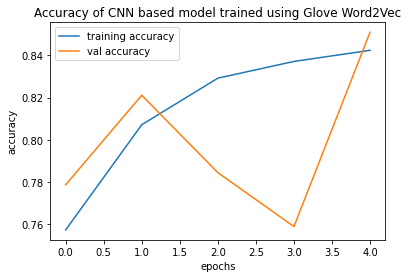

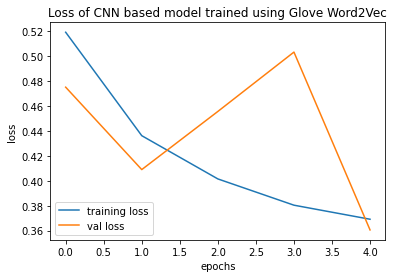

In [94]:
plt.figure(0)
plt.plot(hist_glove.history['accuracy'], label='training accuracy')
plt.plot(hist_glove.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy of CNN based model trained using Glove Word2Vec')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(hist_glove.history['loss'], label='training loss')
plt.plot(hist_glove.history['val_loss'], label='val loss')
plt.title('Loss of CNN based model trained using Glove Word2Vec')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [96]:
model3_probs = model3.predict(X_test_tfidf.todense())
metrics.roc_auc_score(y_test,model3_probs)

0.5

In [97]:
#Initialize model
tf.keras.backend.clear_session()
model4 = tf.keras.Sequential()

In [98]:
model4.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

In [99]:
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.LSTM(256)) #RNN State - size of cell state and hidden state
model4.add(tf.keras.layers.Dropout(0.2))

In [100]:
model4.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500050    
_________________________________________________________________
dropout (Dropout)            (None, 300, 50)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               314368    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 814,675
Trainable params: 314,625
Non-trainable params: 500,050
_________________________________________________________________


In [101]:
#Compile the model
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [102]:
hist_glove=model4.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(X_test, y_test))

Epoch 1/5
586/586 [==============================] - 13s 20ms/step - loss: 0.6617 - accuracy: 0.6023 - val_loss: 0.6017 - val_accuracy: 0.6907
Epoch 2/5
586/586 [==============================] - 11s 19ms/step - loss: 0.6339 - accuracy: 0.6364 - val_loss: 0.4402 - val_accuracy: 0.8074
Epoch 3/5
586/586 [==============================] - 12s 20ms/step - loss: 0.4427 - accuracy: 0.8016 - val_loss: 0.3762 - val_accuracy: 0.8288
Epoch 4/5
586/586 [==============================] - 12s 20ms/step - loss: 0.4019 - accuracy: 0.8165 - val_loss: 0.3573 - val_accuracy: 0.8472
Epoch 5/5
586/586 [==============================] - 12s 20ms/step - loss: 0.3783 - accuracy: 0.8326 - val_loss: 0.3594 - val_accuracy: 0.8413


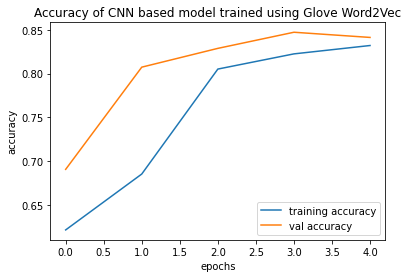

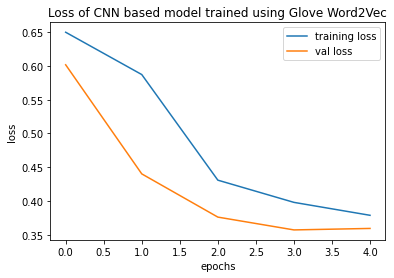

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(hist_glove.history['accuracy'], label='training accuracy')
plt.plot(hist_glove.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy of CNN based model trained using Glove Word2Vec')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(hist_glove.history['loss'], label='training loss')
plt.plot(hist_glove.history['val_loss'], label='val loss')
plt.title('Loss of CNN based model trained using Glove Word2Vec')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [107]:
x = model4.get_layer('lstm').output
model5 = tf.keras.Model(model4.input, x)
model5.predict(X_test[0:1]).shape

(1, 256)

In [ ]:
#test_data = pd.read_table('/Users/debajyotidas/Documents/GitHub/IMDB Reviews Sentiment Analysis using NLP Technques/Data/testData.tsv.zip',header=None,names=['id','review'],sep='\t')

In [108]:
test_data = pd.read_csv('testData.tsv.zip',header=0, delimiter="\t", quoting=3)

In [109]:
test_phrase = tokenizer.texts_to_sequences(test_data['review'])
test_phrase = tf.keras.preprocessing.sequence.pad_sequences(test_phrase,maxlen=max_review_length, padding='pre',truncating='pre')

In [110]:
test_predict = model3.predict(test_phrase)

In [111]:
test_predict.shape

(25000, 1)

In [112]:
predictions = []
for val in test_predict:
    predictions.append(np.argmax(val))

In [113]:
id = test_data['id'].values

In [114]:
final_answer = pd.DataFrame({'id':id,'sentiment':predictions})

In [115]:
filename = 'IMDB_SentiMentAnalysis_output.csv'
final_answer.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: IMDB_SentiMentAnalysis_output.csv
